|<img style="float:left;" src="http://pierreproulx.espaceweb.usherbrooke.ca/images/usherb_transp.gif"> |Pierre Proulx, ing, professeur|
|:---|:---|
|Département de génie chimique et de génie biotechnologique |** GCH200-Phénomènes d'échanges I **|



### Section 6.3, exemple 6.3-1

* seulement en régime de Stokes. Autrement il faut utiliser numpy.

In [8]:
#
# Pierre Proulx
#
# Préparation de l'affichage et des outils de calcul symbolique
#
import sympy as sp
from IPython.display import *
sp.init_printing(use_latex=True)

In [9]:
# Paramètres, variables et fonctions
rho_s,rho,D,v_inf,mu,g=sp.symbols('rho_s,rho,D,v_inf,mu,g')                                                            

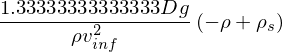

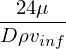

In [10]:
f=4/3*g*D/v_inf**2*(rho_s-rho)/rho  # equation définissant le facteur f
display(f)
Re=rho*v_inf*D/mu                           
f_v=(24/Re)        # équation calculant f par la friction, régime de Stokes
display(f_v)

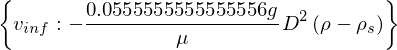

In [11]:
# Dictionnaire contenant les valeurs des paramètres. 
# Valeurs prises pour avoir le régime de Stokes
dico={'rho_s':1000,'rho':1.4,'D':50e-6,'mu':1.6e-5,'g':9.81}
#
eq=sp.Eq(f-f_v)
v=sp.solve((eq,0),v_inf)
display(v)

In [12]:
v=v_inf.subs(v)
v=v.subs(dico)
display(v)

In [13]:
Re=Re.subs(dico)
Re=Re.subs(v_inf,v)
display(Re)

Maintenant, regardons un cas plus général, une particule qui tombe mais qui n'est pas dans le régime de Stokes.

On doit maintenant utiliser un autre outil, pas *sympy* mais plutot *scipy*, qui effectuera la recherche des racines numériquement, pas analytiquement.

Mettons les valeurs numériques de l'exemple 6-3.1

In [14]:
import numpy as np
import math
from scipy.optimize import fsolve, root
#
# définir la fonction dont on cherche les zéros
#
def f(D):
    f1=(math.sqrt(24*vis/(rho*vinf*D))+0.5407)**2
    f2=4./3.*g*D/(vinf**2)*(rhop-rho)/rho
    return f1-f2
#
# valeurs des paramètres
#                       
rhop=2620
Mair=28.966
rho=1590
vis=0.00958                 
g=9.81
vinf=0.65
D=fsolve(f,.1)   # fonction de recherche de zéros de scipy.optimize, valeur 'guess' de .1
print(D*100, 'cm')

[ 2.07031821] cm
